In [1]:
def confusion_matrix_article(Y,Z):
    print(type(Y),type(Z))
    
    
    np.seterr(divide='ignore', invalid='ignore')
    #print(np.diag(Y[0]))
    #print(sum(Z[0]))
    M = np.zeros((Y.shape[1],Y.shape[1]))
    W = np.zeros(Y.shape[1])
    print("M is ", M.shape)
    for i in range(len(Y)):
        if(np.allclose(Y[i],Z[i])):
            print(i, " - Y and Z are equal")
            C = np.diag(Y[i])
            print(C.shape)
        else:
            Y_complement_Z = np.where((Y[i]-Z[i])<0, 0, (Y[i]-Z[i]))
            print("|Yi\Zi| = ",sum(Y_complement_Z), ", shape = ", Y_complement_Z.shape)
            Z_complement_Y = np.where((Z[1]-Y[1])<0, 0, (Z[1]-Y[1]))
            print("|Zi\Yi| = ", sum(Z_complement_Y), ", shape = ", Y_complement_Z.shape)
            #Y_intersect_Z = (Y[i] & Z[i])
            
            for j in range(Y.shape[1]):
                if(Y[i][j]==Z[i][j]):
                    W[j]=Y[i][j]
                else:
                    W[j]=0
            
            Y_intersect_Z = W
            #### it will be a 861 x 861 matrix
            if (sum(Y_complement_Z)==0):  #if |Yi\Zi|=0
                # 𝐶=[(𝑌i∩𝑍i)⊗(𝑍i\𝑌i)+|𝑌i|⋅𝑑𝑖𝑎𝑔(𝑌i)]/|𝑍i|
                C1 = np.kron(Y_intersect_Z,Z_complement_Y)
                C2 = np.dot(sum(Y[i]),np.diag(Y[i]))
                C1 = C1.reshape(Y.shape[1],Y.shape[1]) 
                C = (C1+C2)/sum(Z[i])
            elif (sum(Z_complement_Y)==0):
                print("i = ", i)
                print("condiçao |Zi\Yi| =  0")
                print("kron:", np.kron(Y_complement_Z,Z[i]))
                C1 = np.kron(Y_complement_Z,Z[i])/sum(Z[i])
                if (np.isnan(np.min(C1))):
                    print("Tem nan em C1")
                    C1[np.isnan(C1)] = 0
                print("C1 = ", C1)
                C2 = np.diag(Z[i])
                if (np.isnan(np.min(C2))):
                    print("Tem nan em C1")
                    C2[np.isnan(C2)] = 0
                C1 = C1.reshape(Y.shape[1],Y.shape[1])
                C = C1+C2
            else:
                print("condiçao |Zi\Yi| diferente de 0")
                C1 = np.kron(Y_complement_Z,Z_complement_Y)/sum(Z_complement_Y)
                C2 = np.diag(Y_intersect_Z)
                C1 = C1.reshape(Y.shape[1],Y.shape[1])
                C = C1+C2
            print(C)
            M = M + C
    print("M = ", M)
    return M

In [2]:
def precision_matrix(M):
    #print(M.shape[0])
    rows = M.shape[0]
    columns = M.shape[1]
    sum_column = M.sum(axis=0)
    sum_row = M.sum(axis=1)
    precision_M = np.zeros((columns,rows))
    
    for i in range(columns):
        for j in range(rows):
            #print("sum_column[",i,"] = ",sum_column[i])
            #print("M[",j,"][",i,"] = ", M[j][i] )
            precision_M[j][i]= (M[j][i])/(sum_column[i])
            #print("precision_M[",j,"][",i,"] = ", precision_M[j][i] )
    
    if (np.isnan(np.min(precision_M))):
                    precision_M[np.isnan(precision_M)] = 0
    
    print("precision_M = ", precision_M)
    
    return precision_M

In [3]:
#!pip install scikit-multilearn -q

# para algoritmos adaptados usaremos KNN e Hierarquical ARAM NN
from skmultilearn.adapt import MLkNN, MLARAM
# para transformação de problemas usaremos Binary Relevance, Classifier Chain e Label Powerset
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
import pandas as pd
import numpy as np
import sys
#np.set_printoptions(threshold=sys.maxsize)
from sklearn.naive_bayes import GaussianNB,MultinomialNB

## Load Train and Validation Dataframe (already one-hot encoded)

In [4]:
split_factor_file_train = "75_25"
split_factor_file_validation = "75_25"



df_train= pd.read_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/PreparedData_train_tissue_Age_BMI_'+ split_factor_file_train + '.csv', sep=",")

df_validation = pd.read_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/PreparedData_validation_tissue_Age_BMI_' + split_factor_file_validation + '.csv', sep=",")

In [5]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)
print(df_train.shape)
df_train.head()


(1651, 234)


Tissue_enhanced_lymphoid_tissue  Tissue_enriched_lung   
0                                0                     0  \
1                                0                     0   
2                                0                     0   
3                                0                     0   
4                                1                     0   

   Tissue_enhanced_esophagus_liver_skin_1   
0                                       0  \
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Group_enriched_cervix_intestine_salivary_gland_thyroid_gland   
0                                                  0             \
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Group_enriched_brain_testis  Tissue_enhanced_kidney_placenta   
0                            0                                0  \
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   Tissue_enriched_testis  Tissue_enhanced_bone_marrow   
0                       0                            0  \
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   Tissue_enhanced_cervix_endometrium_1  Tissue_enhanced_intestine_stomach_1   
0                                     0                                    0  \
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   ...  Tissue_enhanced_breast_choroid_plexus  Tissue_enriched_heart_muscle   
0  ...                                      0                             0  \
1  ...                                      0                             0   
2  ...                                      0                             0   
3  ...                                      0                             0   
4  ...                                      0                             0   

   Tissue_enhanced_bone_marrow_stomach_1_urinary_bladder   
0                                                  0      \
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Tissue_enhanced_esophagus_salivary_gland_skin_1_vagina   
0                                                  0       \
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Tissue_enhanced_brain_parathyroid_gland   
0                                        0  \
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Tissue_enhanced_bone_marrow_lung_lymphoid_tissue   
0                                                 0  \
1                                                 0   
2                                                 0   
3                                  

In [6]:
df_validation = df_validation.drop(['Unnamed: 0'], axis=1)
#df_validation = df_validation.drop(['Unnamed: 0','index'], axis=1) #60_40 

print(df_validation.shape)
df_validation.head()

(5, 234)


Tissue_enhanced_lymphoid_tissue  Tissue_enriched_lung   
0                                0                     0  \
1                                0                     0   
2                                0                     0   
3                                1                     0   
4                                0                     0   

   Tissue_enhanced_esophagus_liver_skin_1   
0                                       0  \
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Group_enriched_cervix_intestine_salivary_gland_thyroid_gland   
0                                                  0             \
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Group_enriched_brain_testis  Tissue_enhanced_kidney_placenta   
0                            0                                0  \
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   Tissue_enriched_testis  Tissue_enhanced_bone_marrow   
0                       0                            0  \
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   Tissue_enhanced_cervix_endometrium_1  Tissue_enhanced_intestine_stomach_1   
0                                     0                                    0  \
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   ...  Tissue_enhanced_breast_choroid_plexus  Tissue_enriched_heart_muscle   
0  ...                                      0                             0  \
1  ...                                      0                             0   
2  ...                                      0                             0   
3  ...                                      0                             0   
4  ...                                      0                             0   

   Tissue_enhanced_bone_marrow_stomach_1_urinary_bladder   
0                                                  0      \
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Tissue_enhanced_esophagus_salivary_gland_skin_1_vagina   
0                                                  0       \
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Tissue_enhanced_brain_parathyroid_gland   
0                                        0  \
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Tissue_enhanced_bone_marrow_lung_lymphoid_tissue   
0                                                 0  \
1                                                 0   
2                                                 0   
3                                  

### Importante que <i>df_validation</i> tenha as mesmas colunas de <i>df_train</i>

In [7]:
print(df_train.dtypes)
print(df_validation.dtypes)

Tissue_enhanced_lymphoid_tissue                                 int64
Tissue_enriched_lung                                            int64
Tissue_enhanced_esophagus_liver_skin_1                          int64
Group_enriched_cervix_intestine_salivary_gland_thyroid_gland    int64
Group_enriched_brain_testis                                     int64
                                                                ...  
Tissue_enhanced_bone_marrow_lung_lymphoid_tissue                int64
Tissue_enhanced_brain_retina                                    int64
Group_enriched_intestine_pancreas                               int64
Age                                                             int64
BMI                                                             int64
Length: 234, dtype: object
Tissue_enhanced_lymphoid_tissue                                 int64
Tissue_enriched_lung                                            int64
Tissue_enhanced_esophagus_liver_skin_1                         

## Treinamento

**Separação da classe e previsores**


In [8]:
df_train.iloc[:,-2:].values #generic features

array([[1, 3],
       [1, 4],
       [1, 4],
       ...,
       [5, 3],
       [5, 3],
       [5, 3]])

In [9]:
df_train.iloc[:,:-2].values #generic labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:


classe = df_train.iloc[:,:-2].values #generic labels # df_train.iloc[:,:852].values #labels
previsores =  df_train.iloc[:,-2:].values #generic features     df_train.iloc[:,852:854].values #features
display(classe)


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
classe.shape

(1651, 232)

In [12]:
display(previsores)

array([[1, 3],
       [1, 4],
       [1, 4],
       ...,
       [5, 3],
       [5, 3],
       [5, 3]])

In [13]:
previsores.shape

(1651, 2)

**Divisão de treino e teste**

- X_train will be the *previsores*
- y_train will be the *classes*

In [14]:
X_train = previsores
y_train = classe

In [15]:
X_train, y_train

(array([[1, 3],
        [1, 4],
        [1, 4],
        ...,
        [5, 3],
        [5, 3],
        [5, 3]]),
 array([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [16]:
y_test = df_validation.iloc[:,:-2].values #labels
X_test = df_validation.iloc[:,-2:].values #features


#y_test = df_validation.iloc[:,:852].values #labels
#X_test = df_validation.iloc[:,852:854].values #features


### Table with scores from all models

In [17]:
df_model_scores = pd.DataFrame()

## Algoritmo Adaptado

### KNN - Funciona OK
### Fix para scikit_Multilearn em https://github.com/scikit-multilearn/scikit-multilearn/issues/230

In [18]:
#http://scikit.ml/api/skmultilearn.adapt.mlknn.html
#from sklearn.model_selection import GridSearchCV
#parameters = {'k': range(1,int(classe.shape[1]/3)), 's': [0.5, 0.7, 1.0]}
#score = 'f1_macro'

#knn = GridSearchCV(MLkNN(), parameters, scoring=score)
#knn.fit(X_train, y_train) 

#print (knn.best_params_, knn.best_score_)

In [19]:
knn = MLkNN(k=int(classe.shape[1]/3)) 
knn.fit(X_train, y_train) 

MLkNN(k=77)

**Previsão com dados de teste**



In [20]:
previsto = knn.predict(X_test) 

# atenção na saída e motivo de não ser visualizada
previsto.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
#y_test is already ndarray
Z = previsto.toarray()
print(Z.shape)
Y = y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  0
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  1
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  2
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.

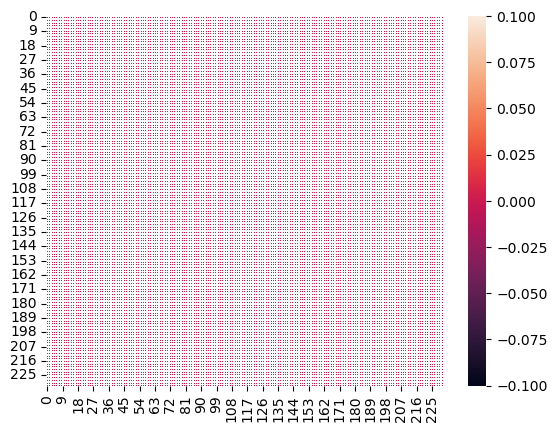

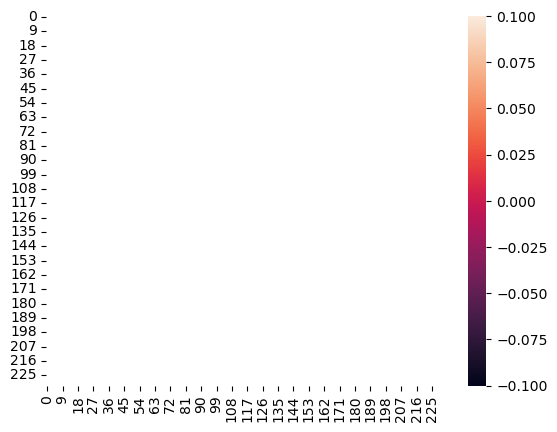

<Figure size 640x480 with 0 Axes>

In [22]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=1)
plt.show()
plt.clf()

### Confusion Matrix Artigo

Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.

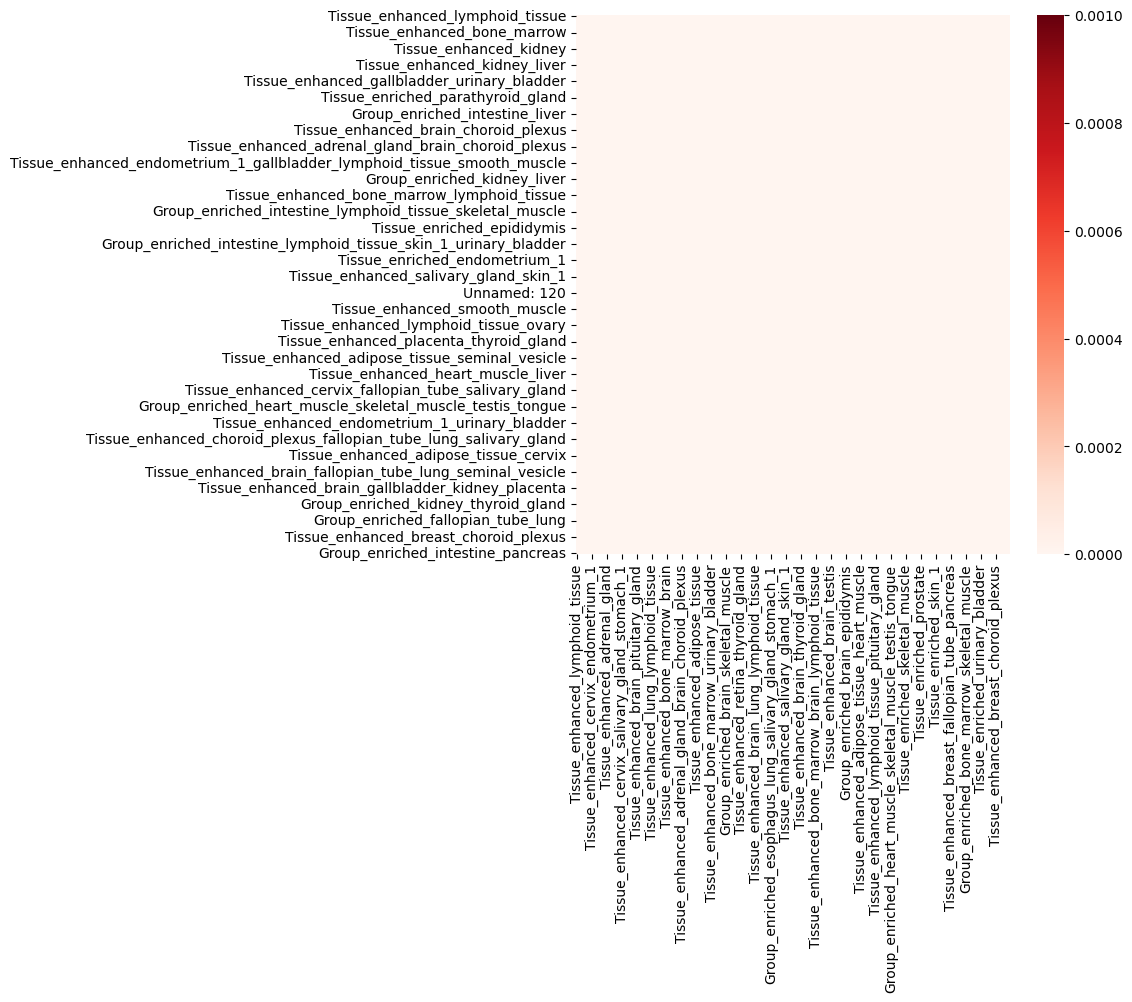

[]


<Figure size 640x480 with 0 Axes>

In [23]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/MLKNN/CM_MLKNN_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')
plt.show()
plt.clf()


#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/MLKNN/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 


**Hamming para avaliar performance**


In [24]:
# equivalent to print(hamming_loss(y_test, previsto.toarray())) 
print(hamming_loss(y_test, previsto)) 

0.004310344827586207


<class 'scipy.sparse._lil.lil_matrix'>
0.0
0.978448275862069
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 

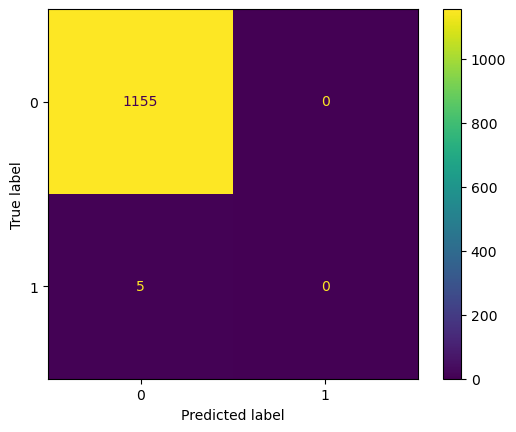

<Figure size 640x480 with 0 Axes>

In [25]:
# https://towardsdatascience.com/evaluating-multi-label-classifiers-a31be83da6ea 

from sklearn.metrics import multilabel_confusion_matrix
result = multilabel_confusion_matrix(y_test, previsto)[0]
result = multilabel_confusion_matrix(y_test, previsto)
result

print(type(previsto))

from sklearn.metrics import jaccard_score
print(jaccard_score(previsto,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,previsto, average='macro',zero_division=True))
print(jaccard_score(y_test,previsto, average='weighted',zero_division=True))
print(jaccard_score(y_test,previsto, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, previsto))


matrices = multilabel_confusion_matrix(y_test, previsto)

cm = confusion_matrix(y_test.ravel(), (previsto.A).ravel())


# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.ravel(), (previsto.A).ravel())
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/MLKNN/CM_MLKNN_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)

        
#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/MLKNN/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
        

true_positive_indices = np.where(matrices[:, 1, 1] == 1)[0]
print(true_positive_indices)




In the above code, tn, fp, fn, and tp represent the values from the confusion matrix. The index of the predicted label is determined by comparing the values of tn and fp. If tn is greater than fp, it indicates the label is predicted as negative (index 0), otherwise, it is predicted as positive (index 1).

At the end of this process, the predicted_labels list will contain the indexes of the predicted labels for each class. In the example given, predicted_labels will be [0, 1, 1], representing the predicted labels for each row.

Please note that the example provided assumes binary classification for each label. If you have more than two labels, you may need to modify the code accordingly.

- Para conseguir as proteinas, deve-se usar a formula de True Positives - aí pega-se a posição

### Precision, Recal, F-Score, Support

In [26]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, previsto, average='macro',zero_division=1))

#define rows to add
rows_to_append = pd.DataFrame([{'Model':'MLKNN', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, previsto),
                               'Prec':precision_recall_fscore_support(y_test, previsto, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, previsto, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, previsto, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,previsto, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])
df_model_scores.head()

#df_model_scores = pd.DataFrame(columns = ["Model", "Proportion", "HL","Prec","Rec","F1","Jac"])

#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))




                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       1.00      1.00      1.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

Model Proportion       HL  Prec       Rec        F1       Jac
0  MLKNN      75_25  0.00431   1.0  0.978448  0.978448  0.978448

### F1-Score
https://medium.com/analytics-vidhya/metrics-for-multi-label-classification-49cc5aeba1c3

In [27]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, previsto))

0.978448275862069


In [28]:
print(type(y_test), type(previsto))

<class 'numpy.ndarray'> <class 'scipy.sparse._lil.lil_matrix'>


### Hierarquical ARAM NN (Adaptive Resonance Associative Map Neural Network) - Funciona OK

In [29]:
aram = MLARAM()
aram.fit(X_train, y_train) 

MLARAM(neurons=[<skmultilearn.adapt.mlaram.Neuron object at 0x17c02e200>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be7b160>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17bdac9d0>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17bdaed40>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be79300>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be78c40>,
                <skmultile...
                <skmultilearn.adapt.mlaram.Neuron object at 0x17beac430>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be0dcc0>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be0e290>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be0e680>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be0f880>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be0e770>,
                <skmultilearn.adapt.mlaram.Neuron object at 0x17be0f910>, ...])

**Previsão com dados de teste**

In [30]:
previsto = aram.predict(X_test) 
previsto

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
#y_test is already ndarray
#Z = previsto
#Y = y_test
#print(Y.shape, Z.shape)
#print(type(Y), type(Z))
#for z in Z:
#    print(z)

#confusion_matrix_article(Y,Z)


#y_test is already ndarray
Z = previsto
print(Z.shape)
Y = y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)
type(precision_M)



(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1.0 , shape =  (232,)
|Zi\Yi| =  1.0 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (232,)
|Zi\Yi| =  1.0 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (232,)
|Zi\Yi| =  1.0 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (232,)
|Zi\Yi| =  1.0 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0.

numpy.ndarray

### Confusion Matrix Article

Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.

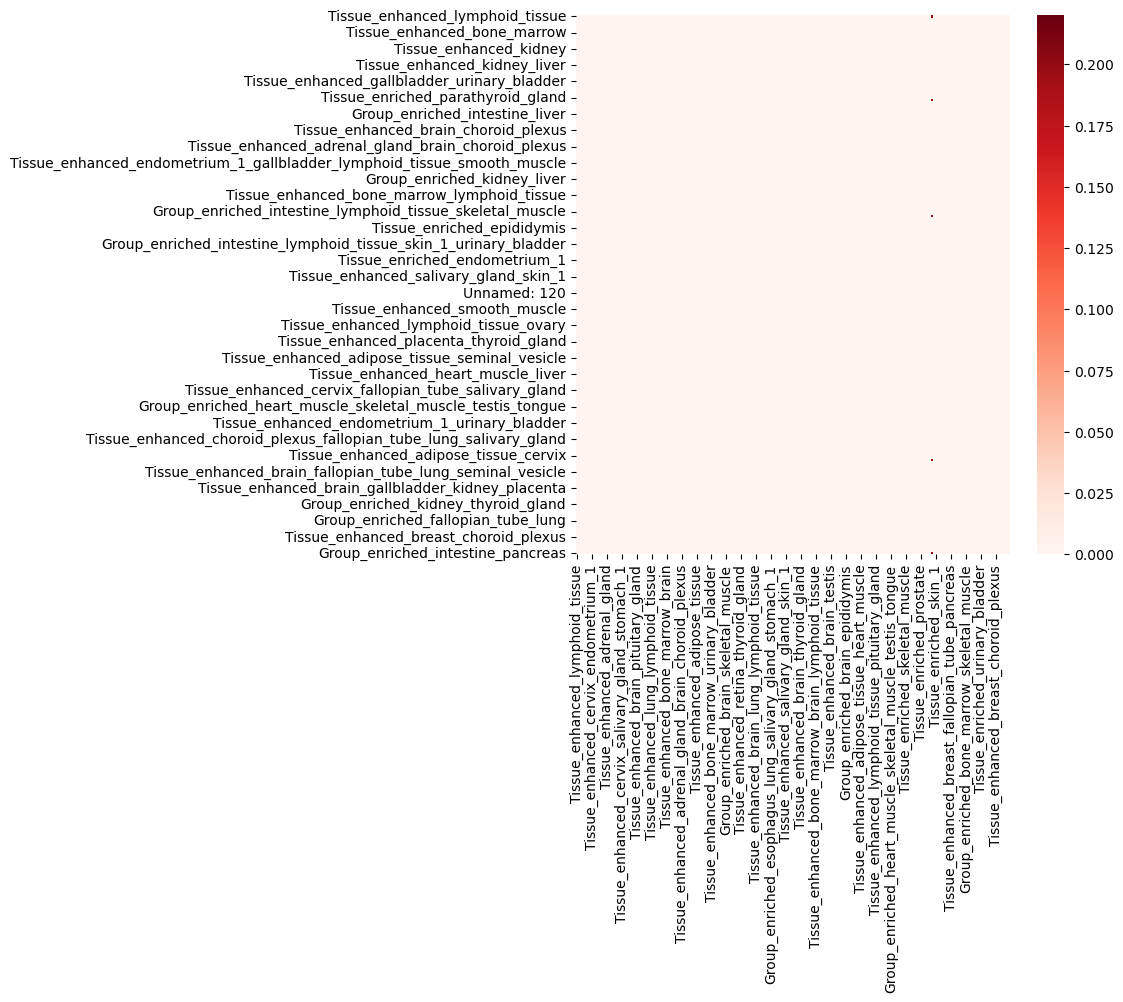

[0, 36, 86, 191, 231]
Tissue_enhanced_lymphoid_tissue
Tissue_enriched_liver
Group_enriched_bone_marrow_lymphoid_tissue
Tissue_enriched_retina
Group_enriched_intestine_pancreas


<Figure size 640x480 with 0 Axes>

In [32]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/HARAM/CM_HARAM_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')

plt.show()
plt.clf()

#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/HARAM/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 
  

**Hamming para avaliar preformance**


In [33]:
print(hamming_loss(y_test, previsto)) 

0.008620689655172414


In [34]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, previsto, average='macro',zero_division=1))


#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))




                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       1.00      1.00      1.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

In [35]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, previsto))

0.9698275862068966


0.0
0.9698275862068966
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]

Model Proportion        HL      Prec       Rec        F1       Jac
0  MLKNN      75_25  0.004310  1.000000  0.978448  0.978448  0.978448
0  HARAM      75_25  0.008621  0.991379  0.978448  0.969828  0.969828

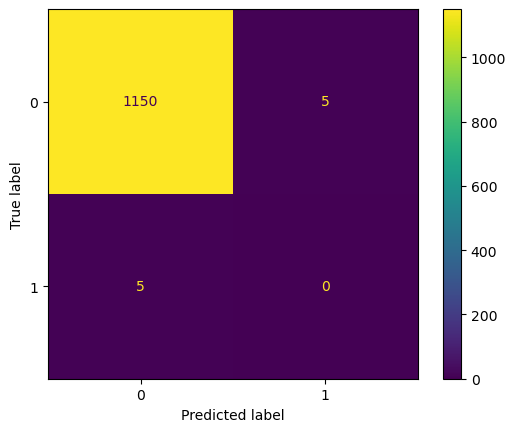

<Figure size 640x480 with 0 Axes>

In [36]:
from sklearn.metrics import jaccard_score
print(jaccard_score(previsto,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,previsto, average='macro',zero_division=True))
print(jaccard_score(y_test,previsto, average='weighted',zero_division=True))
print(jaccard_score(y_test,previsto, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, previsto))

print(type(previsto))

matrices = multilabel_confusion_matrix(y_test, previsto)

cm = confusion_matrix(y_test.ravel(), previsto.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.ravel(), previsto.ravel())
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/HARAM/CM_HARAM_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/HARAM/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
        
true_positive_indices = np.where(matrices[:, 1, 1] == 1)[0]
print(true_positive_indices)


#define rows to add
rows_to_append = pd.DataFrame([{'Model':'HARAM', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, previsto),
                               'Prec':precision_recall_fscore_support(y_test, previsto, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, previsto, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, previsto, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,previsto, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head()

## Transformação de Problema

## Binary Relevance com Multinomial Naive Bayes

In [37]:
binary = BinaryRelevance(MultinomialNB())

#binary = BinaryRelevance(classifier = SVC())


In [38]:
binary.fit(X_train, y_train)
# https://stackoverflow.com/questions/67307405/how-to-resolve-valueerror-the-number-of-classes-has-to-be-greater-than-one-got 

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [39]:
previsao = binary.predict(X_test)
print(hamming_loss(y_test, previsao))

0.004310344827586207


In [40]:
previsao.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, previsao,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, previsao, average='macro',zero_division=1))


#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))




                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       1.00      1.00      1.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

In [42]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, previsto))

0.9698275862068966


0.0
0.978448275862069
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

Model Proportion        HL      Prec       Rec        F1   
0             MLKNN      75_25  0.004310  1.000000  0.978448  0.978448  \
0             HARAM      75_25  0.008621  0.991379  0.978448  0.969828   
0  BR_MultinomialNB      75_25  0.004310  1.000000  0.978448  0.978448   

        Jac  
0  0.978448  
0  0.969828  
0  0.978448

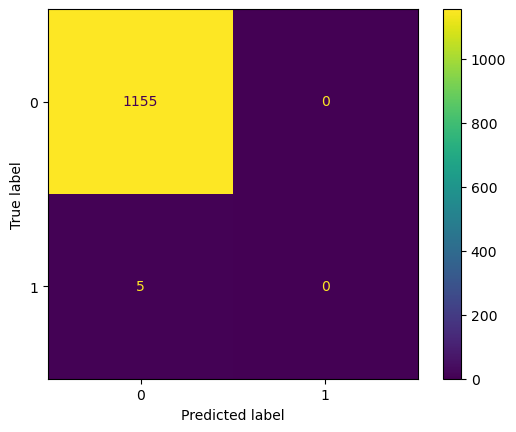

<Figure size 640x480 with 0 Axes>

In [43]:
from sklearn.metrics import jaccard_score
print(jaccard_score(previsao.A,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,previsao.A, average='macro',zero_division=True))
print(jaccard_score(y_test,previsao.A, average='weighted',zero_division=True))
print(jaccard_score(y_test,previsao.A, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, previsao))


matrices = multilabel_confusion_matrix(y_test, previsao.A)

cm = confusion_matrix(y_test.ravel(), previsao.A.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.ravel(), previsao.A.ravel(),values_format='')
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/BR_MultinomialNB/CM_BR_MultinomialNB_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/BR_MultinomialNB/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
 


true_positive_indices = np.where(matrices[:, 1, 1] == 1)[0]
print(true_positive_indices)


#define rows to add
rows_to_append = pd.DataFrame([{'Model':'BR_MultinomialNB', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, previsao),
                               'Prec':precision_recall_fscore_support(y_test, previsao, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, previsao, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, previsao, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,previsao, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head()

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  0
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  1
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  2
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.

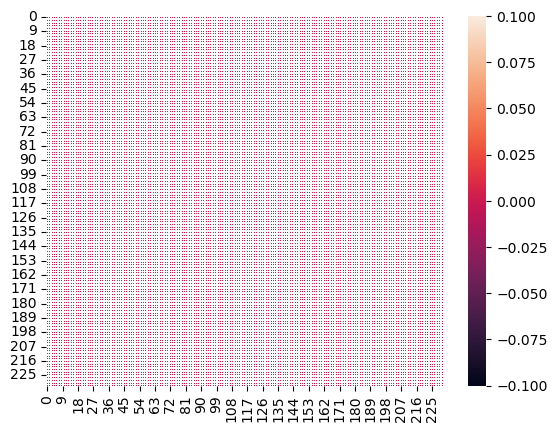

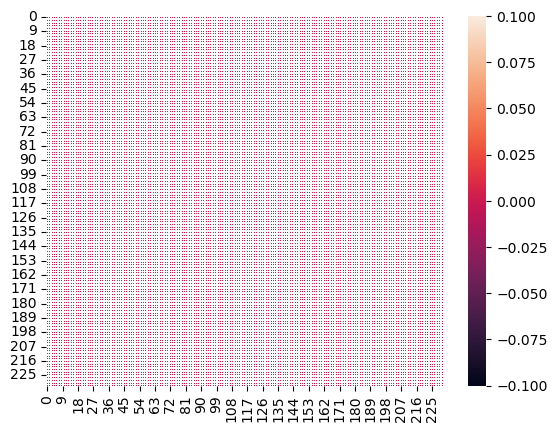

In [44]:
#y_test is already ndarray
Z = previsao.A
print(Z.shape)
Y = y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

### Confusion matrix Article

Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.

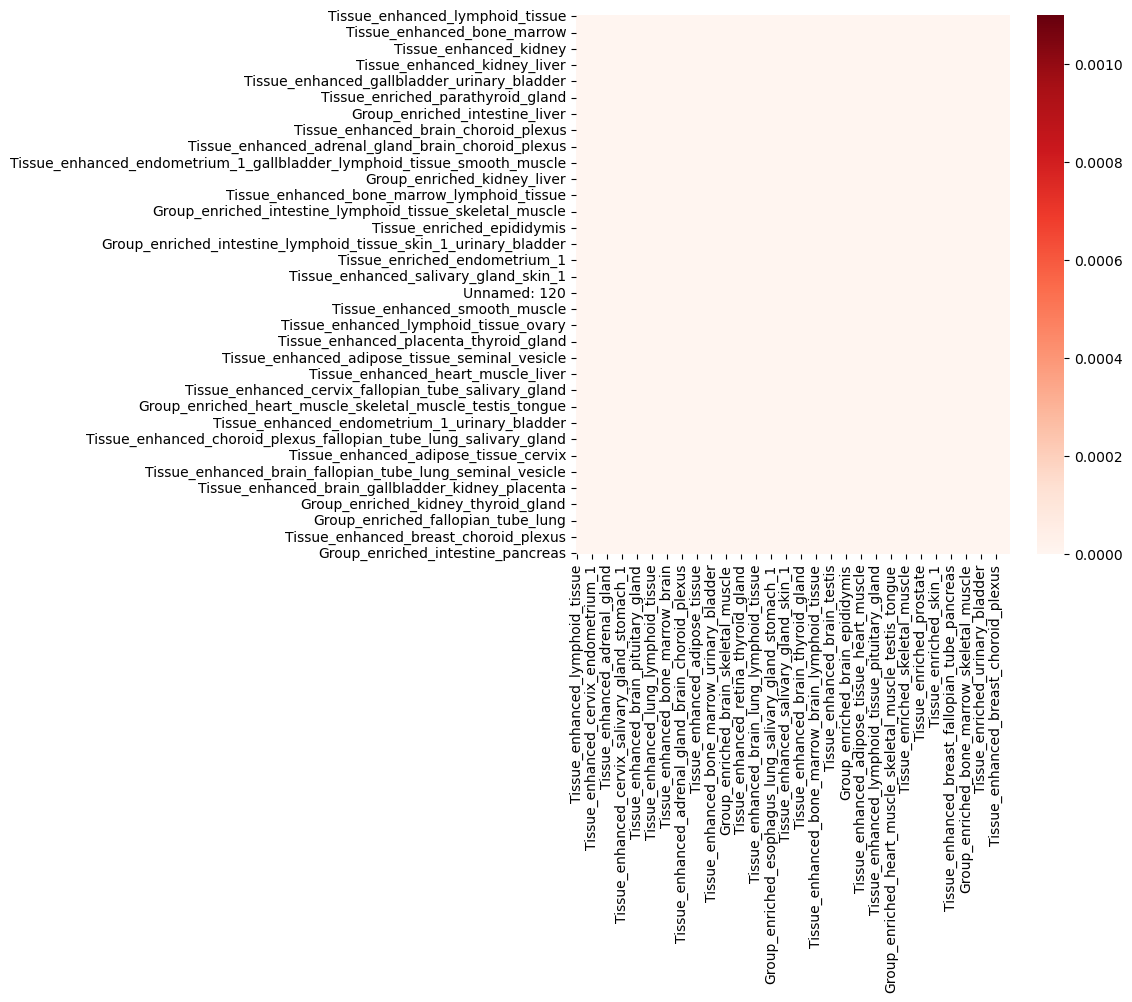

[]


<Figure size 640x480 with 0 Axes>

In [45]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/BR_MultinomialNB/CM_BR_MultinomialNB_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')

plt.show()
plt.clf()

#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/BR_MultinomialNB/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 

### Label Powerset with GradientBoostingClassifier

In [46]:
#binary = BinaryRelevance(GaussianNB()) #Agora com Gaussian NB

from sklearn.ensemble import GradientBoostingClassifier
#binary = BinaryRelevance(GaussianNB()) #Agora com Gaussian NB
#binary = BinaryRelevance(BernoulliNB())
#binary = BinaryRelevance(GradientBoostingClassifier())
binary = LabelPowerset(GradientBoostingClassifier())

In [47]:
binary.fit(X_train, y_train)

LabelPowerset(classifier=GradientBoostingClassifier(),
              require_dense=[True, True])

In [48]:
previsao = binary.predict(X_test)

In [49]:
print(hamming_loss(y_test, previsao))

0.008620689655172414


In [50]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, previsao,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, previsao, average='macro',zero_division=1))


#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))




                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       1.00      1.00      1.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

In [51]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, previsao))

0.9698275862068966


0.0
0.9698275862068966
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]

Model Proportion        HL      Prec       Rec   
0                           MLKNN      75_25  0.004310  1.000000  0.978448  \
0                           HARAM      75_25  0.008621  0.991379  0.978448   
0                BR_MultinomialNB      75_25  0.004310  1.000000  0.978448   
0  Label Powerset GradientBooster      75_25  0.008621  0.991379  0.978448   

         F1       Jac  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.978448  0.978448  
0  0.969828  0.969828

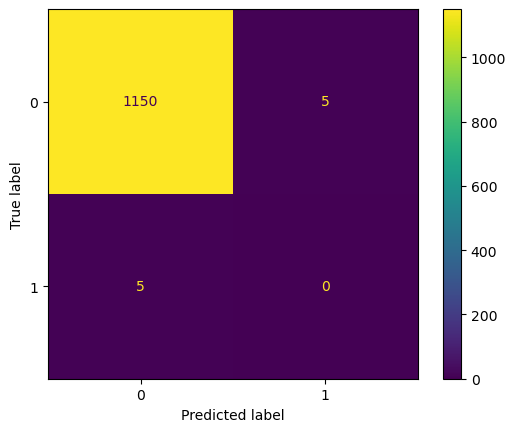

<Figure size 640x480 with 0 Axes>

In [52]:
from sklearn.metrics import jaccard_score
print(jaccard_score(previsao.A,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,previsao.A, average='macro',zero_division=True))
print(jaccard_score(y_test,previsao.A, average='weighted',zero_division=True))
print(jaccard_score(y_test,previsao.A, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, previsao))


matrices = multilabel_confusion_matrix(y_test, previsao.A)

cm = confusion_matrix(y_test.ravel(), previsao.A.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.ravel(), previsao.A.ravel(),values_format='')
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/BR_GaussianNB/CM_BR_GaussianNB_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')

plt.clf()


num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/BR_GaussianNB/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
 
        
        
true_positive_indices = np.where(matrices[:, 1, 1] == 1)[0]
print(true_positive_indices)

#define rows to add
rows_to_append = pd.DataFrame([{'Model':'Label Powerset GradientBooster', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, previsao),
                               'Prec':precision_recall_fscore_support(y_test, previsao, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, previsao, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, previsao, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,previsao, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head()

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.

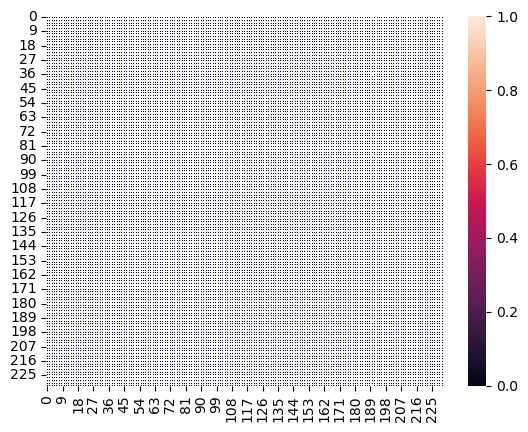

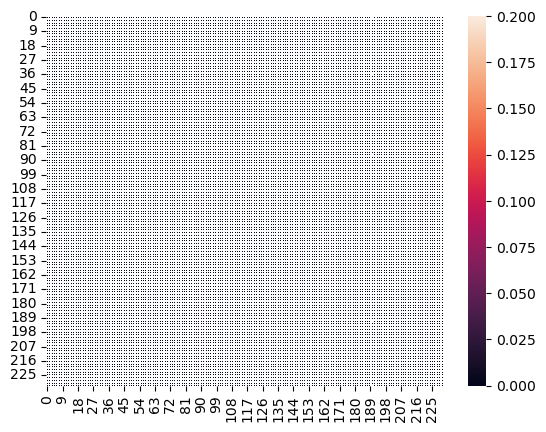

In [53]:
#y_test is already ndarray
Z = previsao.A
print(Z.shape)
Y = y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

### Confusion Matrix Article

Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.

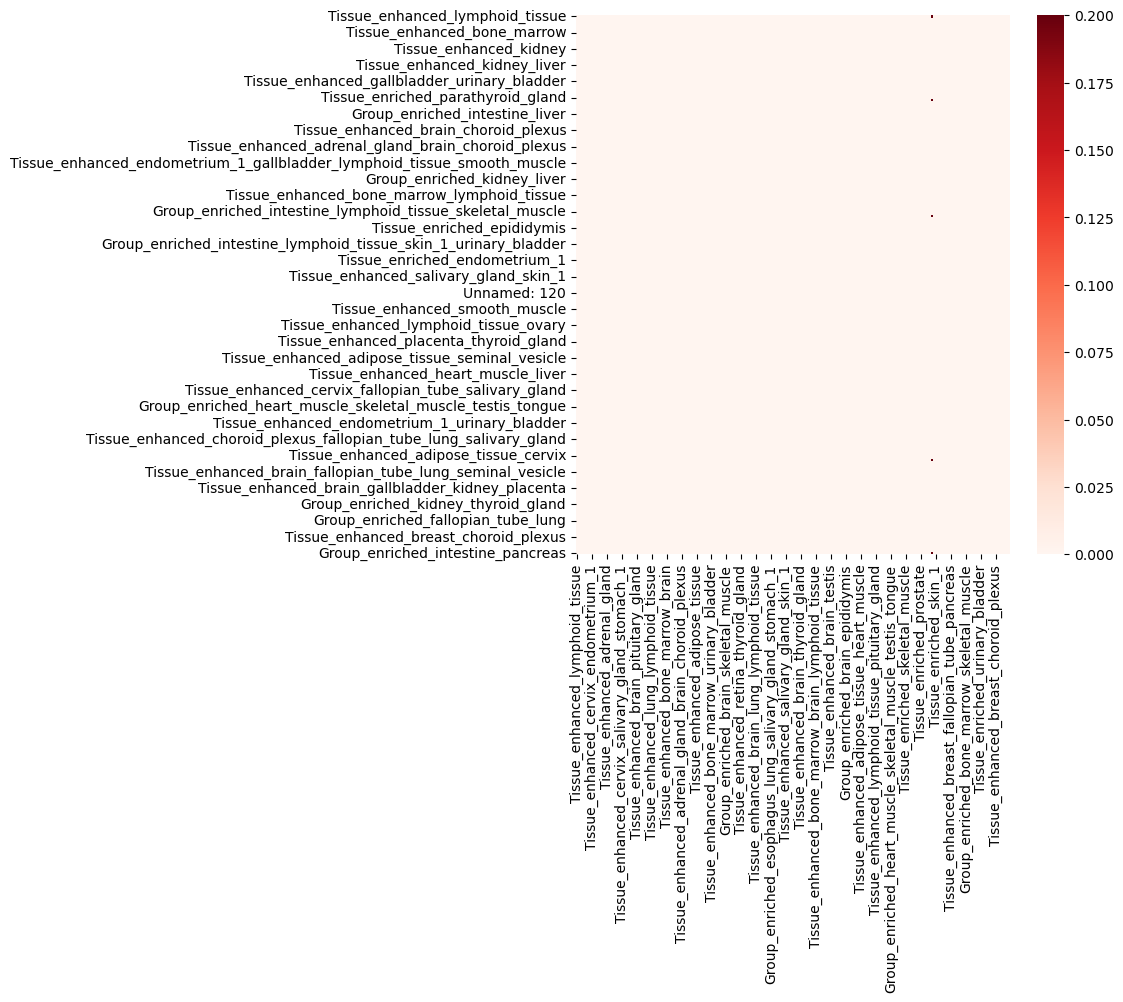

[0, 36, 86, 191, 231]
Tissue_enhanced_lymphoid_tissue
Tissue_enriched_liver
Group_enriched_bone_marrow_lymphoid_tissue
Tissue_enriched_retina
Group_enriched_intestine_pancreas


<Figure size 640x480 with 0 Axes>

In [54]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/BR_GaussianNB/CM_BR_GaussianNB_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')
plt.show()
plt.clf()

#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/BR_GaussianNB/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 

### Classifier Chain

In [55]:
#chain = ClassifierChain(classifier = MultinomialNB())
#chain.fit(X_train, y_train)
#previsoes = chain.predict(X_test)
#print(hamming_loss(y_test,previsoes))
from sklearn.tree import ExtraTreeClassifier
chain = ClassifierChain(classifier = ExtraTreeClassifier())
chain.fit(X_train, y_train)
previsoes = chain.predict(X_test)
print(hamming_loss(y_test,previsoes))

0.008620689655172414


In [56]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, previsoes,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, previsoes, average='macro',zero_division=1))


#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))




                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       1.00      1.00      1.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

In [57]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, previsoes))

0.9698275862068966


0.0
0.9698275862068966
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]

Model Proportion        HL      Prec       Rec   
0                           MLKNN      75_25  0.004310  1.000000  0.978448  \
0                           HARAM      75_25  0.008621  0.991379  0.978448   
0                BR_MultinomialNB      75_25  0.004310  1.000000  0.978448   
0  Label Powerset GradientBooster      75_25  0.008621  0.991379  0.978448   
0                 ClassifierChain      75_25  0.008621  0.991379  0.978448   

         F1       Jac  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.969828  0.969828

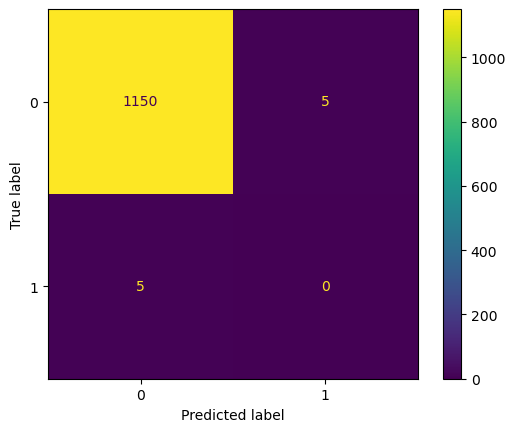

<Figure size 640x480 with 0 Axes>

In [58]:
from sklearn.metrics import jaccard_score
print(jaccard_score(previsoes.A,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,previsoes.A, average='macro',zero_division=True))
print(jaccard_score(y_test,previsoes.A, average='weighted',zero_division=True))
print(jaccard_score(y_test,previsoes.A, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, previsao))


matrices = multilabel_confusion_matrix(y_test, previsoes.A)

cm = confusion_matrix(y_test.ravel(), previsoes.A.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.ravel(), previsoes.A.ravel(),values_format='')
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/ClassifierChains/CM_ClassifierChains_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/ClassifierChains/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
 
true_positive_indices = np.where(matrices[:, 1, 1] == 1)[0]
print(true_positive_indices)


#define rows to add
rows_to_append = pd.DataFrame([{'Model':'ClassifierChain', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, previsoes),
                               'Prec':precision_recall_fscore_support(y_test, previsoes, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, previsoes, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, previsoes, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,previsoes, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head()




In [59]:
#             Predicted
#             0       1
# Actual 0   TN      FP
#        1   FN      TP


- TN (True Negative): The number of correctly predicted negative instances.
- FP (False Positive): The number of incorrectly predicted positive instances.
- FN (False Negative): The number of incorrectly predicted negative instances.
- TP (True Positive): The number of correctly predicted positive instances.

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.

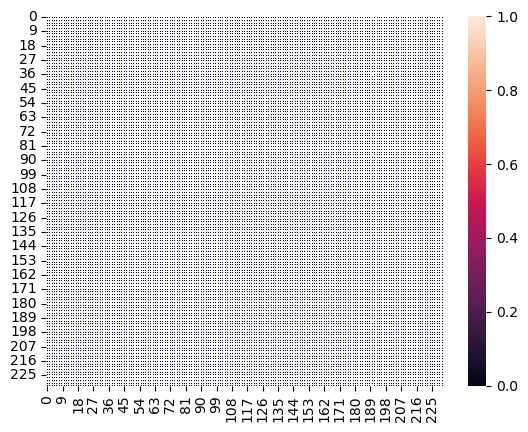

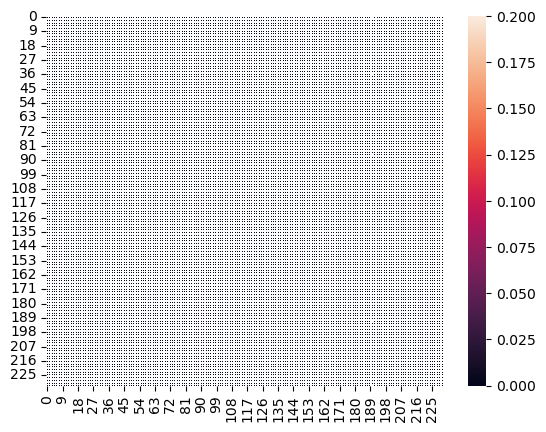

In [60]:
#y_test is already ndarray
Z = previsoes.A
print(Z.shape)
Y = y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

### Confusion Matrix Article

Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.

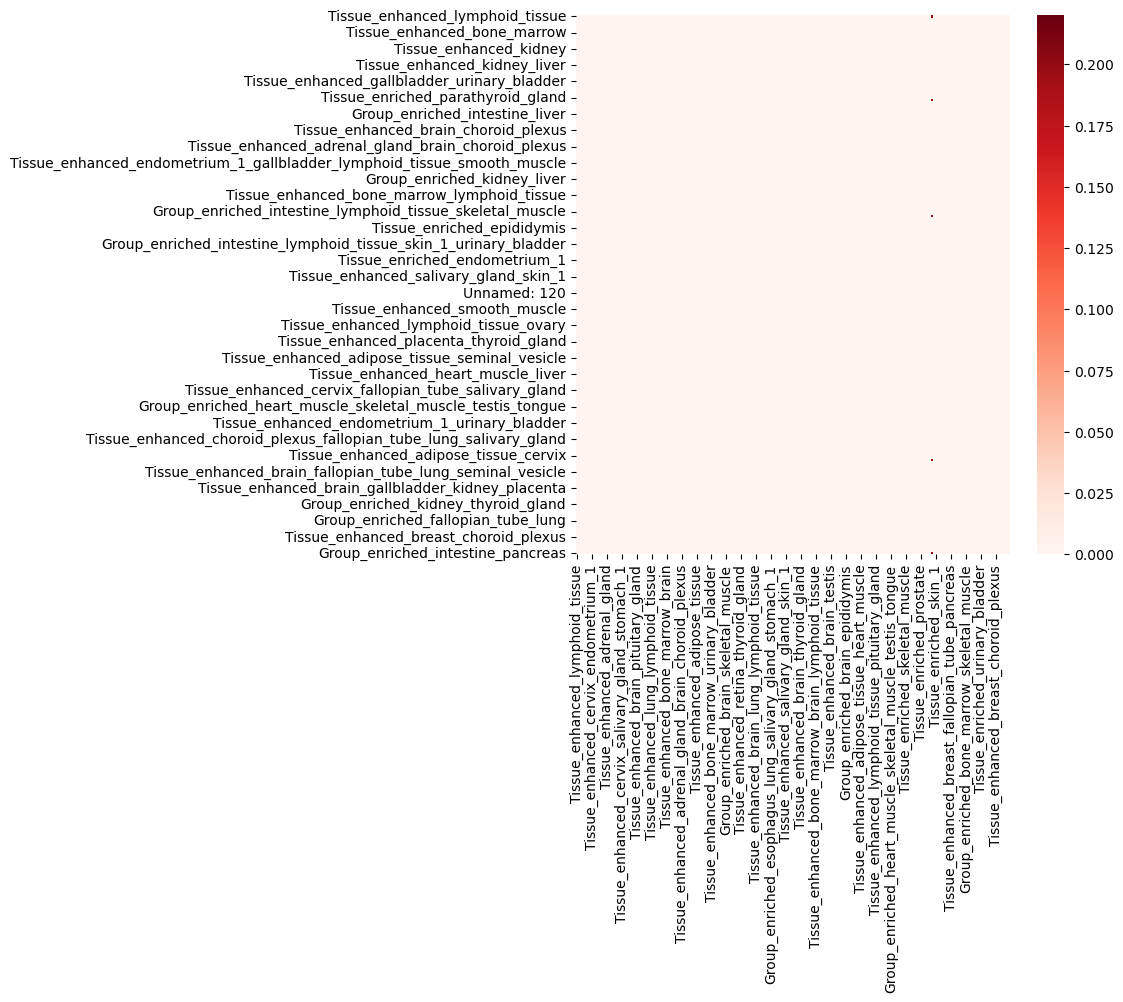

[0, 36, 86, 191, 231]
Tissue_enhanced_lymphoid_tissue
Tissue_enriched_liver
Group_enriched_bone_marrow_lymphoid_tissue
Tissue_enriched_retina
Group_enriched_intestine_pancreas


<Figure size 640x480 with 0 Axes>

In [61]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/ClassifierChains/CM_ClassifierChains_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')

plt.show()
plt.clf()

#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/ClassifierChains/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 

### Label PowerSet - Funciona OK

In [62]:
label = LabelPowerset(classifier = SVC())
label.fit(X_train, y_train)
previsoes = label.predict(X_test)
print(hamming_loss(y_test,previsoes))

0.008620689655172414


In [63]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, previsoes,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, previsoes, average='macro',zero_division=1))


#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))




                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       1.00      1.00      1.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

In [64]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, previsoes))

0.9698275862068966


0.0
0.9698275862068966
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]

Model Proportion        HL      Prec       Rec   
0                           MLKNN      75_25  0.004310  1.000000  0.978448  \
0                           HARAM      75_25  0.008621  0.991379  0.978448   
0                BR_MultinomialNB      75_25  0.004310  1.000000  0.978448   
0  Label Powerset GradientBooster      75_25  0.008621  0.991379  0.978448   
0                 ClassifierChain      75_25  0.008621  0.991379  0.978448   
0              Label Powerset SVC      75_25  0.008621  0.991379  0.978448   

         F1       Jac  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.969828  0.969828  
0  0.969828  0.969828

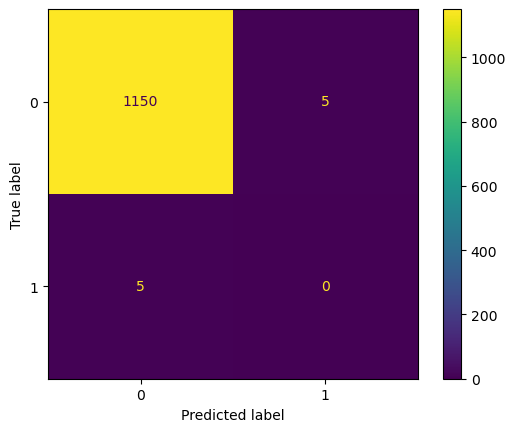

<Figure size 640x480 with 0 Axes>

In [65]:
from sklearn.metrics import jaccard_score
print(jaccard_score(previsoes.A,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,previsoes.A, average='macro',zero_division=True))
print(jaccard_score(y_test,previsoes.A, average='weighted',zero_division=True))
print(jaccard_score(y_test,previsoes.A, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, previsao))


matrices = multilabel_confusion_matrix(y_test, previsoes.A)

cm = confusion_matrix(y_test.ravel(), previsoes.A.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.ravel(), previsoes.A.ravel(),values_format='')
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/LabelPowerSet/CM_LabelPowerSet_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/LabelPowerSet/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
 
#define rows to add
rows_to_append = pd.DataFrame([{'Model':'Label Powerset SVC', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, previsoes),
                               'Prec':precision_recall_fscore_support(y_test, previsoes, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, previsoes, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, previsoes, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,previsoes, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head(20)

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  1 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.

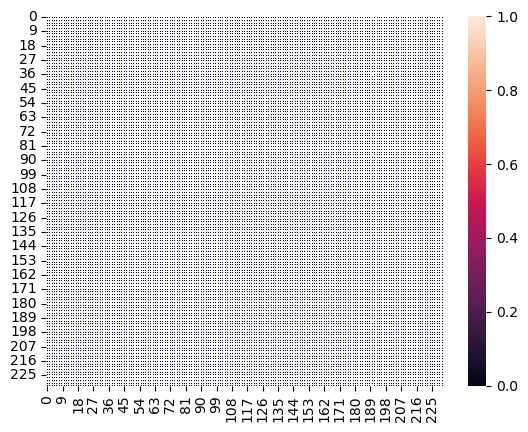

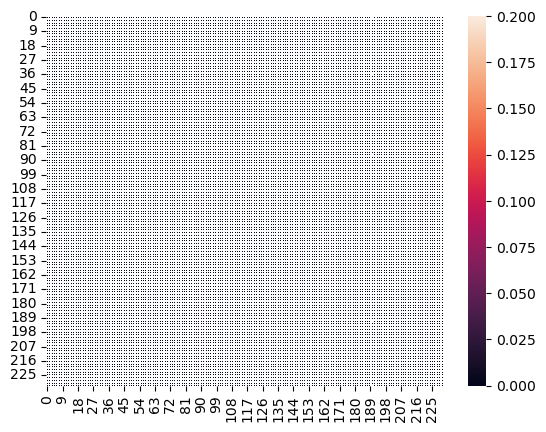

In [66]:
#y_test is already ndarray
Z = previsoes.A
print(Z.shape)
Y = y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

### Confusion Matrix Article

Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.2 . Min value:  0.0
Max value:  0.

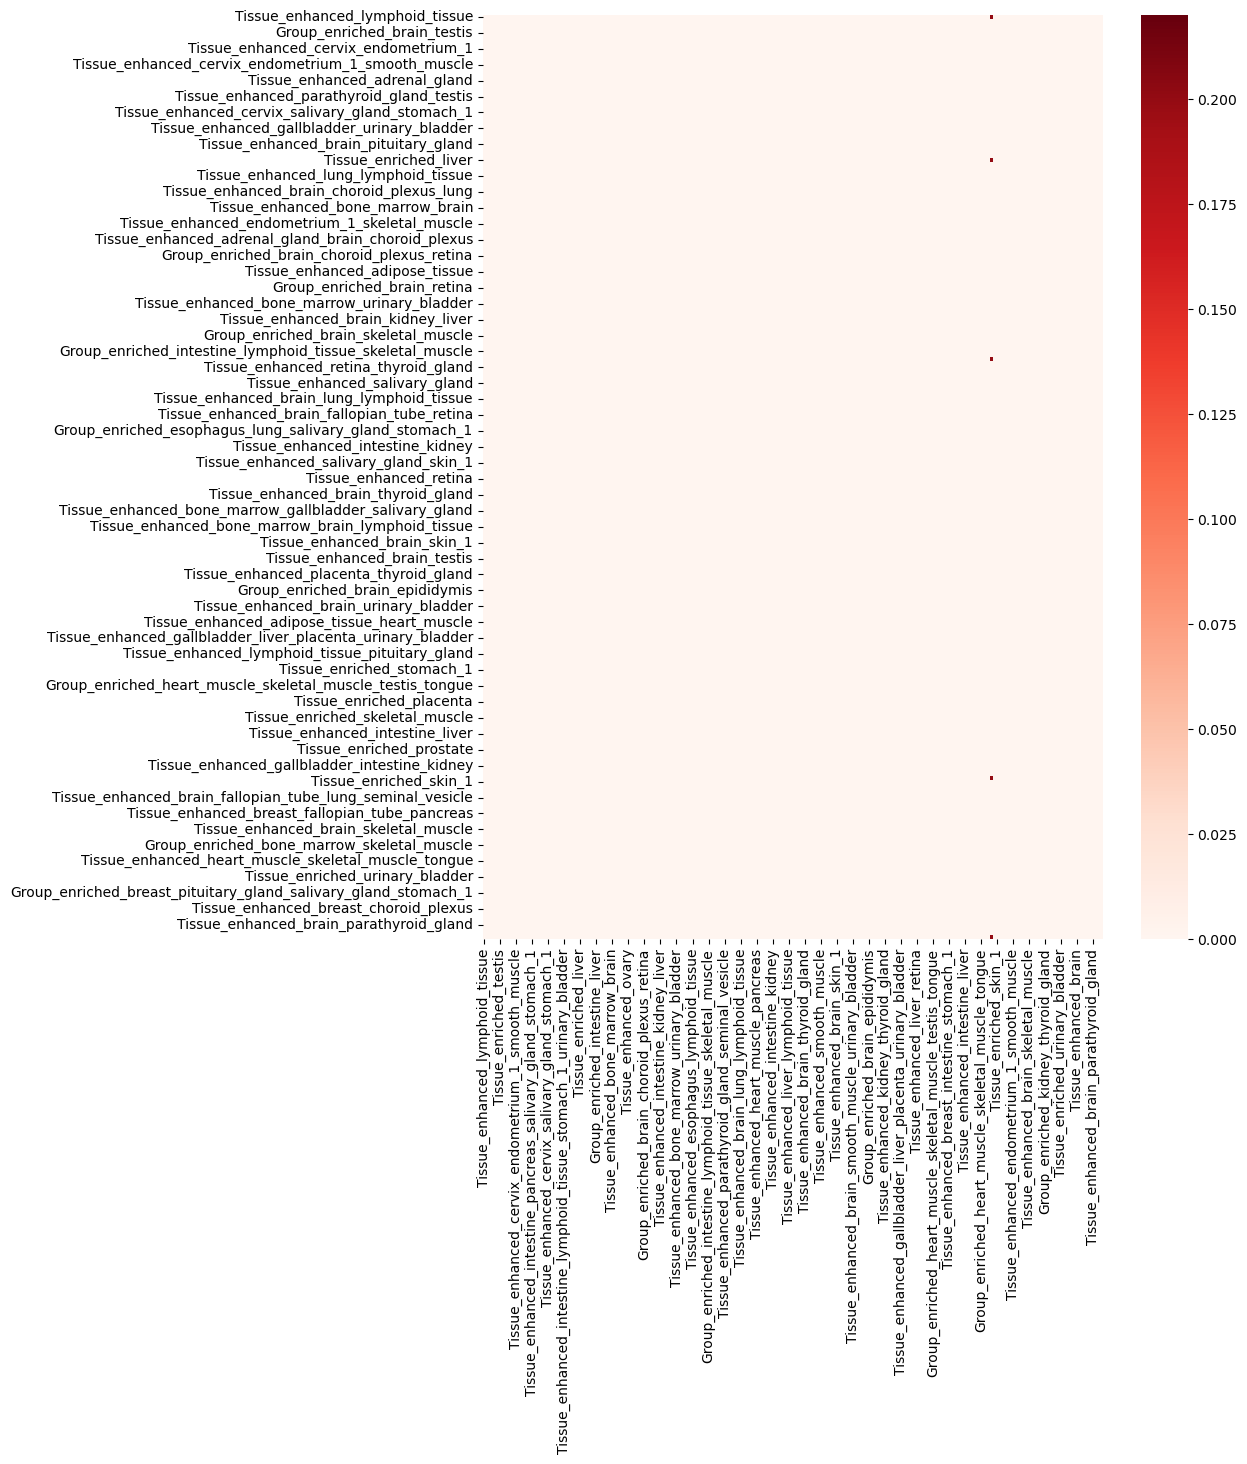

[0, 36, 86, 191, 231]
Tissue_enhanced_lymphoid_tissue
Tissue_enriched_liver
Group_enriched_bone_marrow_lymphoid_tissue
Tissue_enriched_retina
Group_enriched_intestine_pancreas


<Figure size 640x480 with 0 Axes>

In [67]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (10,12))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/LabelPowerSet/CM_LabelPowerSet_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')

plt.show()
plt.clf()

#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/LabelPowerSet/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 

### RandomForest - Funciona OK

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf = clf.fit(X_train, y_train)

In [69]:
#Test
predicted_labels = clf.predict(X_test)
print(hamming_loss(y_test,predicted_labels))
    

0.005172413793103448


In [70]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, predicted_labels,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, predicted_labels, average='macro',zero_division=1))


#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))




                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       1.00      1.00      1.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

In [71]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, predicted_labels))

0.9741379310344828


0.0
0.9741379310344828
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]

Model Proportion        HL      Prec       Rec   
0                           MLKNN      75_25  0.004310  1.000000  0.978448  \
0                           HARAM      75_25  0.008621  0.991379  0.978448   
0                BR_MultinomialNB      75_25  0.004310  1.000000  0.978448   
0  Label Powerset GradientBooster      75_25  0.008621  0.991379  0.978448   
0                 ClassifierChain      75_25  0.008621  0.991379  0.978448   

         F1       Jac  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.969828  0.969828

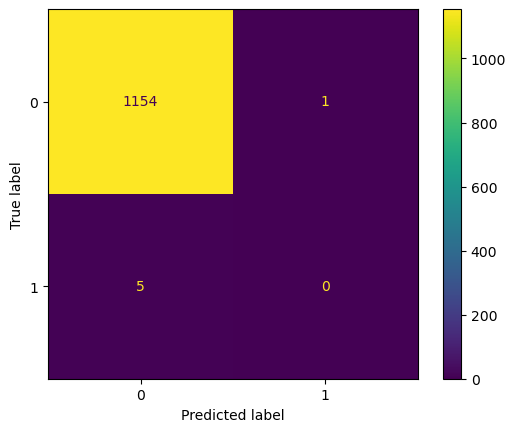

<Figure size 640x480 with 0 Axes>

In [72]:
from sklearn.metrics import jaccard_score
print(jaccard_score(predicted_labels,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,predicted_labels, average='macro',zero_division=True))
print(jaccard_score(y_test,predicted_labels, average='weighted',zero_division=True))
print(jaccard_score(y_test,predicted_labels, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, previsao))


matrices = multilabel_confusion_matrix(y_test, predicted_labels)

cm = confusion_matrix(y_test.ravel(), predicted_labels.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.ravel(), predicted_labels.ravel(),values_format='')
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/RandomForest/CM_RandomForest_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/RandomForest/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
 
        
    
#define rows to add
rows_to_append = pd.DataFrame([{'Model':'RandomForest', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, predicted_labels),
                               'Prec':precision_recall_fscore_support(y_test, predicted_labels, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, predicted_labels, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, predicted_labels, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,predicted_labels, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head()

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  0
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  1
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  2
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.

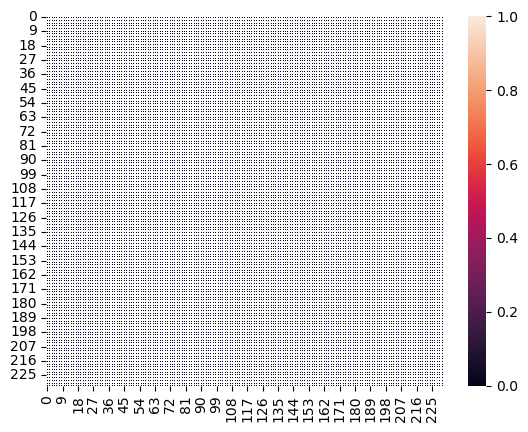

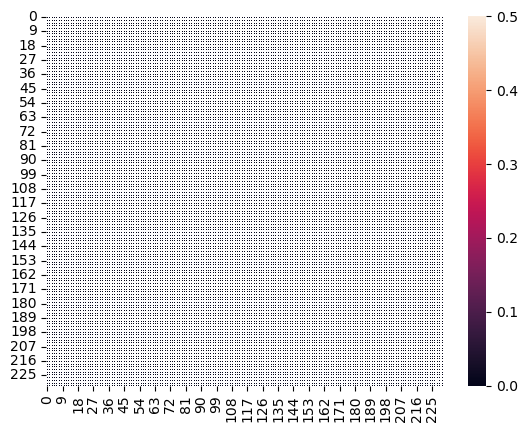

In [73]:
#y_test is already ndarray
Z = predicted_labels
print(Z.shape)
Y = y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

### Confusion Matrix Article

Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.

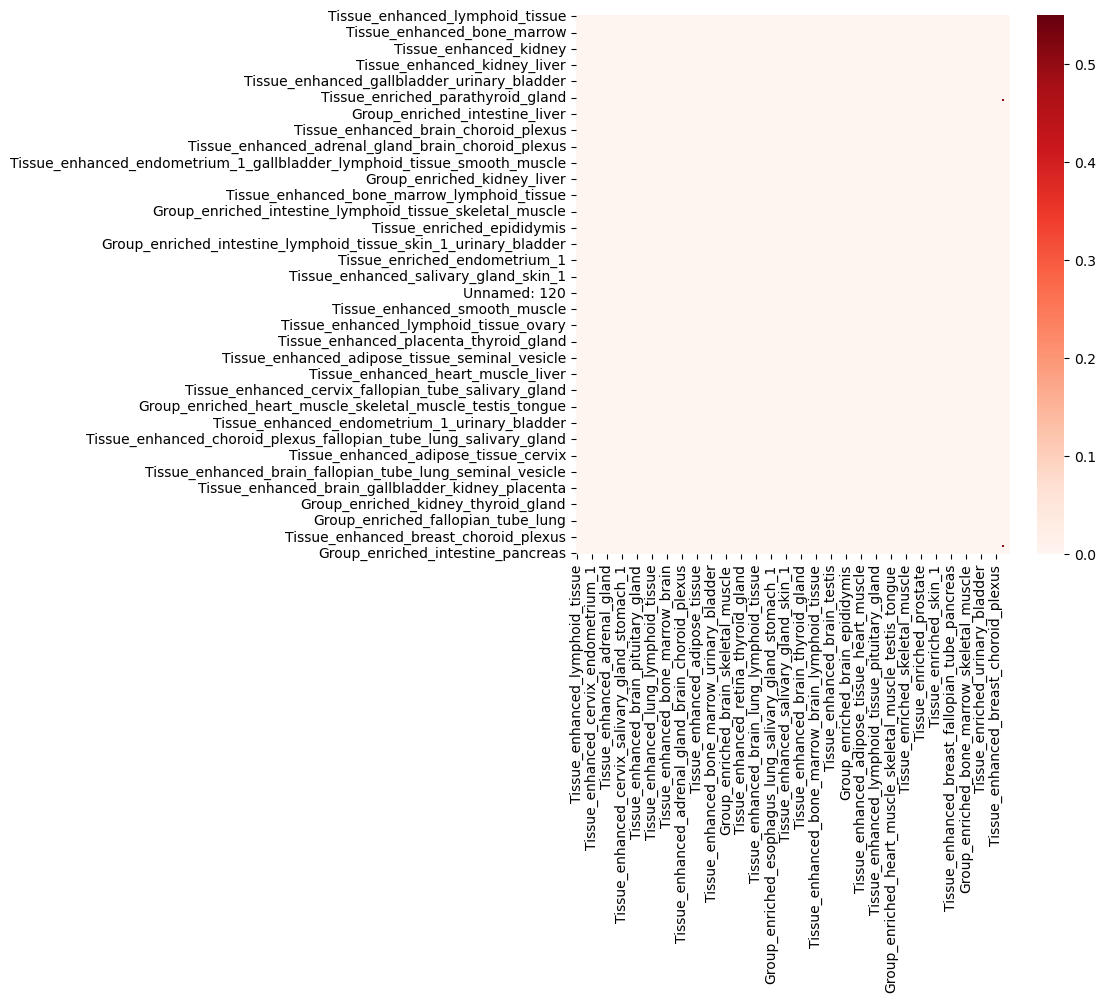

[36, 228]
Tissue_enriched_liver
Tissue_enhanced_brain_parathyroid_gland


<Figure size 640x480 with 0 Axes>

In [74]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/RandomForest/CM_RandomForest_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')

plt.show()
plt.clf()

#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/RandomForest/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 

### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

In [76]:
#Test
predicted_labels = clf.predict(X_test)
print(hamming_loss(y_test,predicted_labels))

0.005172413793103448


In [77]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, predicted_labels,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, predicted_labels, average='macro',zero_division=1))


#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))




                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       1.00      1.00      1.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

In [78]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, predicted_labels))

0.9741379310344828


0.0
0.9741379310344828
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]

Model Proportion        HL      Prec       Rec   
0                           MLKNN      75_25  0.004310  1.000000  0.978448  \
0                           HARAM      75_25  0.008621  0.991379  0.978448   
0                BR_MultinomialNB      75_25  0.004310  1.000000  0.978448   
0  Label Powerset GradientBooster      75_25  0.008621  0.991379  0.978448   
0                 ClassifierChain      75_25  0.008621  0.991379  0.978448   

         F1       Jac  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.969828  0.969828

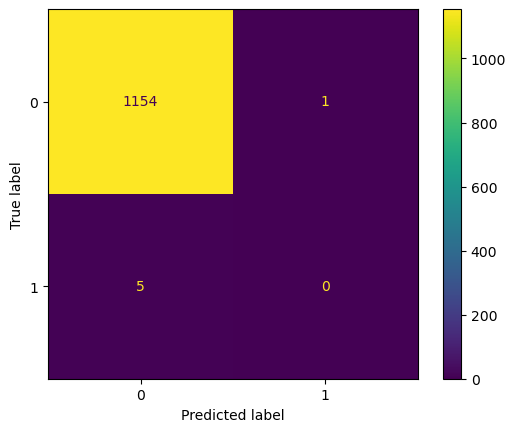

<Figure size 640x480 with 0 Axes>

In [79]:
from sklearn.metrics import jaccard_score
print(jaccard_score(predicted_labels,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,predicted_labels, average='macro',zero_division=True))
print(jaccard_score(y_test,predicted_labels, average='weighted',zero_division=True))
print(jaccard_score(y_test,predicted_labels, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, previsao))


matrices = multilabel_confusion_matrix(y_test, predicted_labels)

cm = confusion_matrix(y_test.ravel(), predicted_labels.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.ravel(), predicted_labels.ravel(),values_format='')
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/DecisionTree/CM_DecisionTree_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/DecisionTree/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
 

#define rows to add
rows_to_append = pd.DataFrame([{'Model':'DecisionTree', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, predicted_labels),
                               'Prec':precision_recall_fscore_support(y_test, predicted_labels, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, predicted_labels, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, predicted_labels, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,predicted_labels, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head()

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  0
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  1
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  0 , shape =  (232,)
i =  2
condiçao |Zi\Yi| =  0
kron: [0 0 0 ... 0 0 0]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.

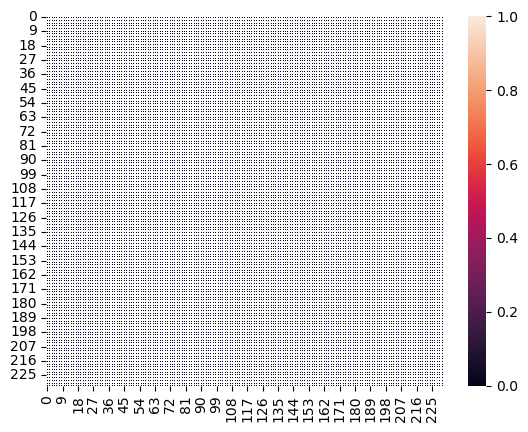

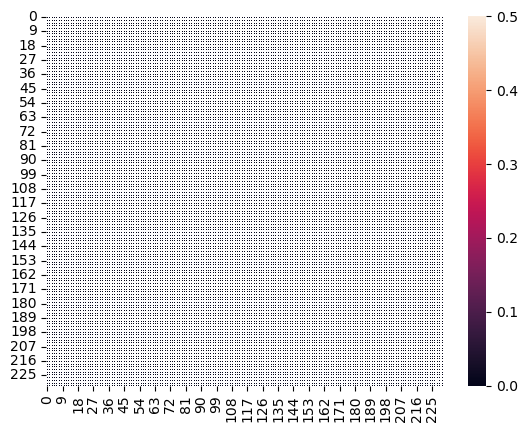

In [80]:
#y_test is already ndarray
Z = predicted_labels
print(Z.shape)
Y = y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

### Confusion Matrix Article

Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.

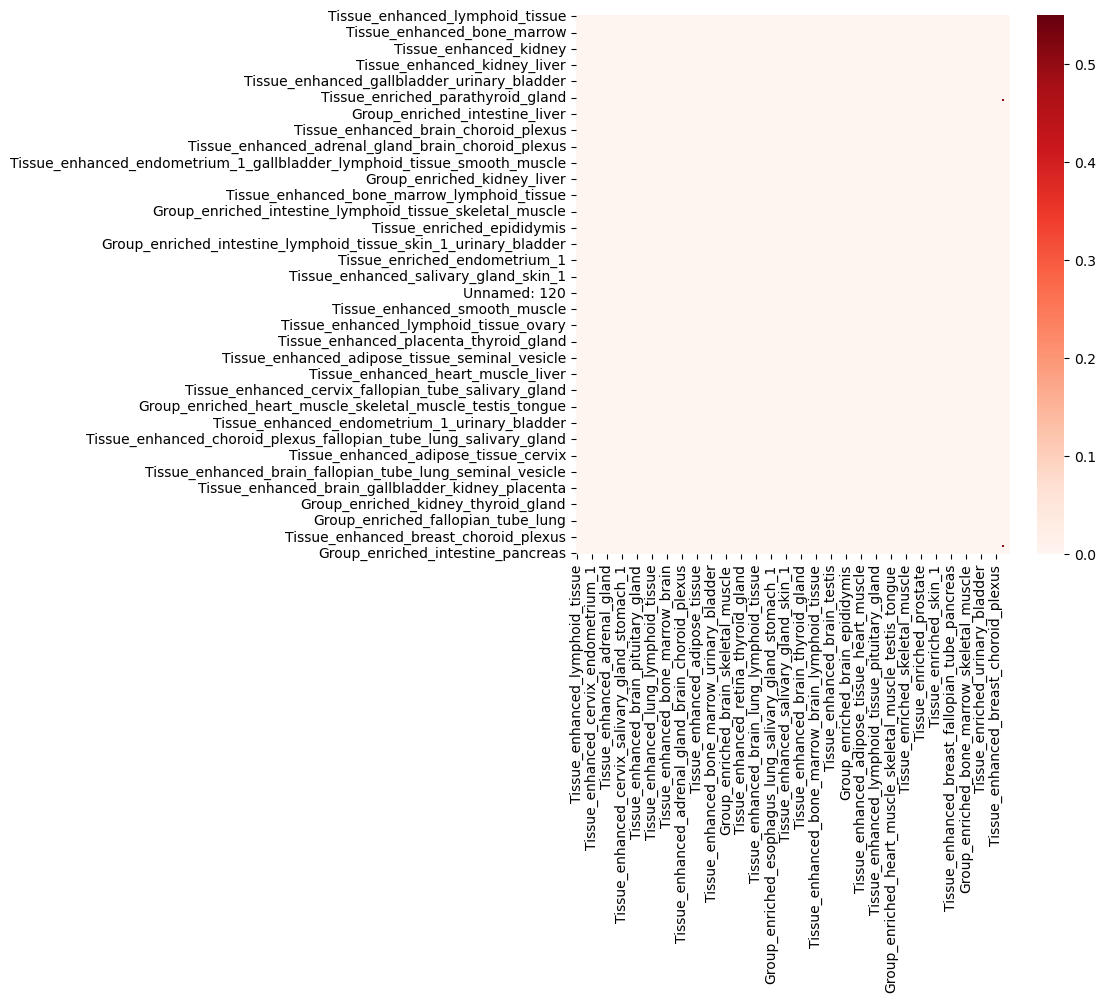

[36, 228]
Tissue_enriched_liver
Tissue_enhanced_brain_parathyroid_gland


<Figure size 640x480 with 0 Axes>

In [81]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/DecisionTree/CM_DecisionTree_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')

plt.show()
plt.clf()

#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/DecisionTree/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 

### Support Vector Machine

In [82]:
from skmultilearn.adapt import MLTSVM
from scipy import sparse

classifier = MLTSVM(c_k = 2**-1)

X_train = sparse.csr_matrix(X_train)
y_train = sparse.csr_matrix(y_train)
y_test = sparse.csr_matrix(y_test)
print(type(X_train),type(y_train))
# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)
print(hamming_loss(y_test,predictions))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
0.41293103448275864


In [83]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, predictions,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, predictions, average='macro',zero_division=1))


#print(precision_recall_fscore_support(y_test, previsto, average='micro',zero_division=1))

#print(precision_recall_fscore_support(y_test, previsto, average='weighted',zero_division=1))


                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       0.20      1.00      0.33         1
                                                   Tissue_enriched_lung       0.00      1.00      0.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       0.00      1.00      0.00         0
                                        Tissue_enhanced_kidney_placenta       0.00      1.00      0.00         0
                                                 Tissue_enriched_testis       0.00      1.00      0.00         0
                                            Tissue_enhanced_bone_marrow       0.00      1.00   

In [84]:
from sklearn.metrics import f1_score

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "macro",zero_division=1)
    return f1


print(f1_sampled(y_test, predictions))

0.2744252873563219


0.002702702702702703
0.27327586206896554
0.08
0.004158004158004158
[[[0 4]
  [0 1]]

 [[0 5]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[4 1]
  [0 0]]

 [[5 0]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[5 0]
  [0 0]]

 [[2 3]
  [0 0]]

 [[5 0]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[4 1]
  [0 0]]

 [[5 0]
  [0 0]]

 [[2 3]
  [0 0]]

 [[5 0]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 1]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[5 0]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[0 4]
  [0 1]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[4 1]
  [0 0]]

 [[2 3]
  [0 0]]

 [[4 1]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[2 3]
  [0 0]]

 [[4 1]
  [0 0]]

 [[5 0]
  [0 0]

Model Proportion        HL      Prec       Rec   
0                           MLKNN      75_25  0.004310  1.000000  0.978448  \
0                           HARAM      75_25  0.008621  0.991379  0.978448   
0                BR_MultinomialNB      75_25  0.004310  1.000000  0.978448   
0  Label Powerset GradientBooster      75_25  0.008621  0.991379  0.978448   
0                 ClassifierChain      75_25  0.008621  0.991379  0.978448   

         F1       Jac  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.969828  0.969828

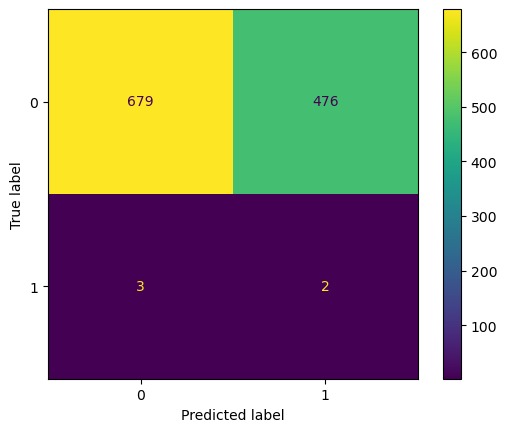

<Figure size 640x480 with 0 Axes>

In [85]:
from sklearn.metrics import jaccard_score
print(jaccard_score(predictions,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,predictions, average='macro',zero_division=True))
print(jaccard_score(y_test,predictions, average='weighted',zero_division=True))
print(jaccard_score(y_test,predictions, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, predictions))


matrices = multilabel_confusion_matrix(y_test, predictions)

print(type(y_test))

cm = confusion_matrix(y_test.A.ravel(), predictions.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.A.ravel(), predictions.ravel(),values_format='')
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/SVM/CM_SVM_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/SVM/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
 
        
#define rows to add
rows_to_append = pd.DataFrame([{'Model':'SVM', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, predictions),
                               'Prec':precision_recall_fscore_support(y_test, predictions, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, predictions, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, predictions, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,predictions, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head()

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  10 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.  ... 0.  0.  0. ]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  10 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  10 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  0 , shape =  (232,)
|Zi\Yi| =  10 , shape =  (232,)
[[0.01351351 0.00675676 0.         ... 0.         0.         0.  

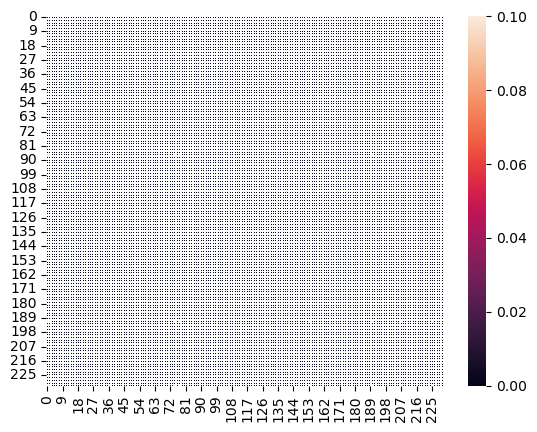

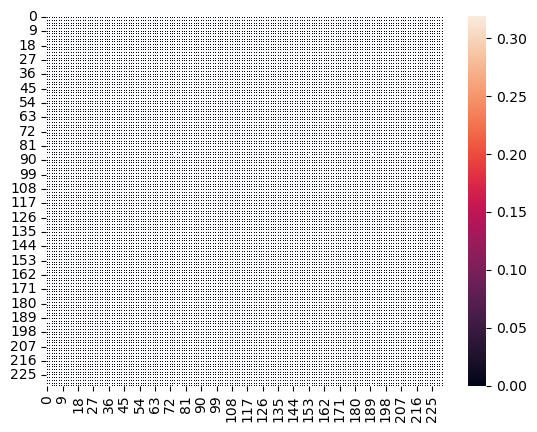

In [86]:
#y_test is already ndarray
Z = predictions
print(Z.shape)
Y = y_test.A
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

### Confusion Matrix Article

Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0
Max value:  0.04219409282700421 . Min value:  0.0


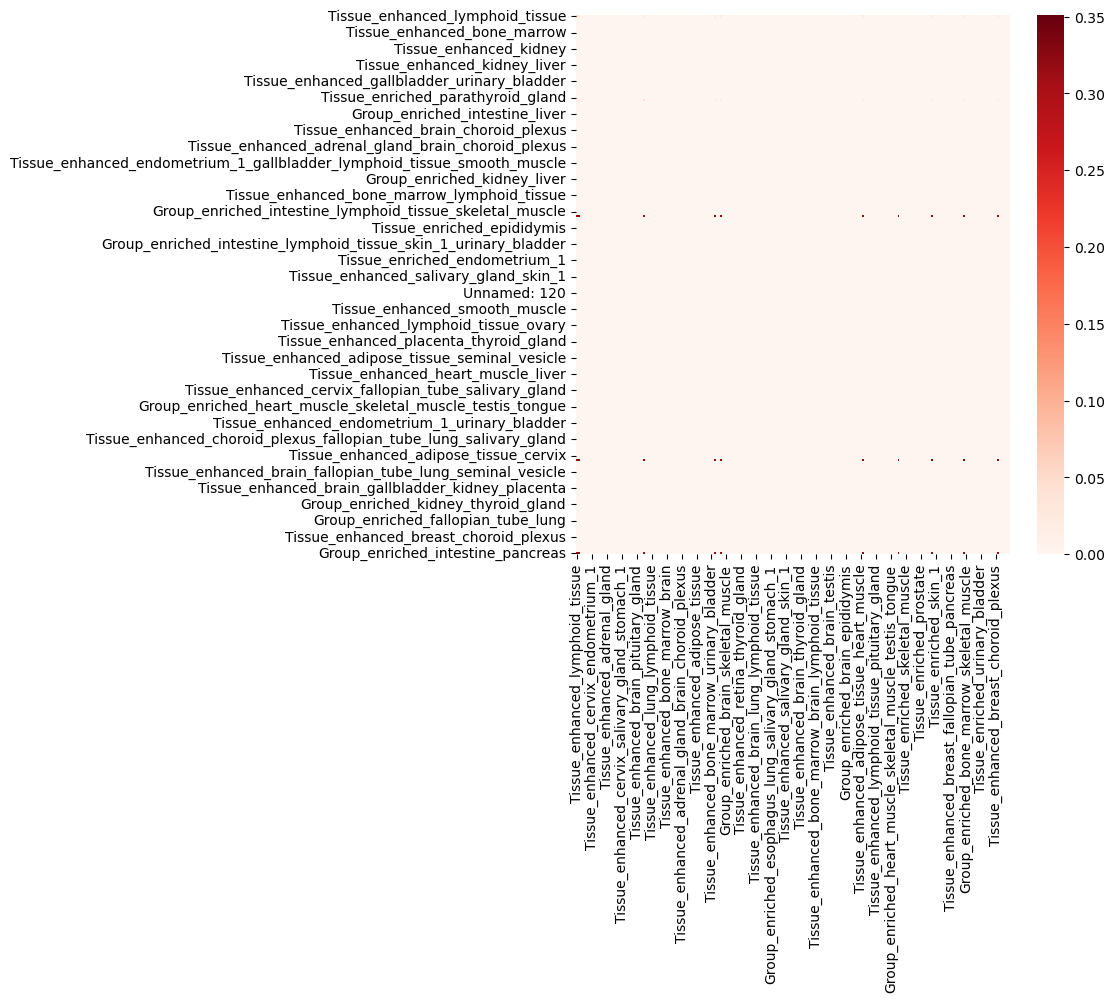

[0, 36, 86, 191, 231]
Tissue_enhanced_lymphoid_tissue
Tissue_enriched_liver
Group_enriched_bone_marrow_lymphoid_tissue
Tissue_enriched_retina
Group_enriched_intestine_pancreas


<Figure size 640x480 with 0 Axes>

In [87]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/SVM/CM_SVM_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')

plt.show()
plt.clf()

#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/SVM/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 

### Binary Relevance kNN - Doesn't work

### RakelD

In [88]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.ensemble import RakelD

classifier = RakelD(
    base_classifier=GaussianNB(),
    base_classifier_require_dense=[True, True],
)



classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print(hamming_loss(y_test,predictions))

/Users/marcelo_palermo/anaconda3/lib/python3.10/site-packages/skmultilearn/cluster/random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(label_sets)


0.017241379310344827


In [89]:
from sklearn.metrics import classification_report

labels = df_train.columns
len(labels)
label_names = labels[:-2]

print(classification_report(y_test, predictions,target_names=label_names,zero_division=1))
#print(classification_report(y_test, previsto,target_names=label_names,zero_division=1))

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, predictions, average='macro',zero_division=1))

                                                                         precision    recall  f1-score   support

                                        Tissue_enhanced_lymphoid_tissue       1.00      0.00      0.00         1
                                                   Tissue_enriched_lung       1.00      1.00      1.00         0
                                 Tissue_enhanced_esophagus_liver_skin_1       1.00      1.00      1.00         0
           Group_enriched_cervix_intestine_salivary_gland_thyroid_gland       1.00      1.00      1.00         0
                                            Group_enriched_brain_testis       0.00      1.00      0.00         0
                                        Tissue_enhanced_kidney_placenta       1.00      1.00      1.00         0
                                                 Tissue_enriched_testis       1.00      1.00      1.00         0
                                            Tissue_enhanced_bone_marrow       1.00      1.00   

0.0
0.9181034482758621
0.0
0.0
[[[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 1]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[4 0]
  [1 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[3 2]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]]

 [[5 0]
  [0 0]

Model Proportion        HL      Prec       Rec   
0                           MLKNN      75_25  0.004310  1.000000  0.978448  \
0                           HARAM      75_25  0.008621  0.991379  0.978448   
0                BR_MultinomialNB      75_25  0.004310  1.000000  0.978448   
0  Label Powerset GradientBooster      75_25  0.008621  0.991379  0.978448   
0                 ClassifierChain      75_25  0.008621  0.991379  0.978448   

         F1       Jac  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.978448  0.978448  
0  0.969828  0.969828  
0  0.969828  0.969828

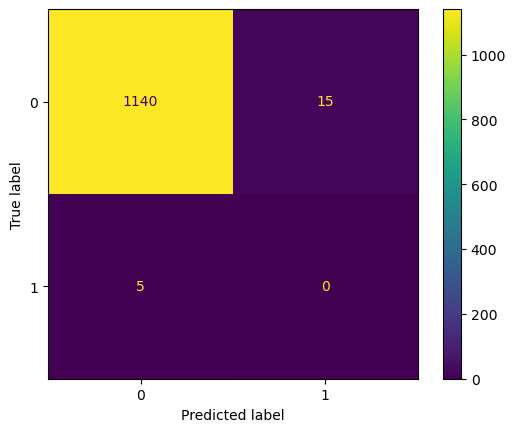

<Figure size 640x480 with 0 Axes>

In [90]:
from sklearn.metrics import jaccard_score
print(jaccard_score(predictions.A,y_test, average='samples', zero_division=True))
print(jaccard_score(y_test,predictions.A, average='macro',zero_division=True))
print(jaccard_score(y_test,predictions.A, average='weighted',zero_division=True))
print(jaccard_score(y_test,predictions.A, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(y_test, predictions.A))


matrices = multilabel_confusion_matrix(y_test, predictions)

print(type(y_test))

cm = confusion_matrix(y_test.A.ravel(), predictions.A.ravel())

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(y_test.A.ravel(), predictions.A.ravel(),values_format='')
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/RakelD/CM_RakelD_" + split_factor_file_train + "_flattened.eps", transparent=True, format='eps')
plt.clf()

num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []

# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm.shape)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 1]
    
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        tp_indices.append(i)


#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df_train.columns[i])
        proteins_confusion_matrix_flattened.append(df_train.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/RakelD/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
 

#define rows to add
rows_to_append = pd.DataFrame([{'Model':'RakelD', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(y_test, predictions),
                               'Prec':precision_recall_fscore_support(y_test, predictions, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(y_test, predictions, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(y_test, predictions, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(y_test,predictions, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])

df_model_scores.head()

(5, 232)
(5, 232)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (232, 232)
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  11 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  11 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  11 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1 , shape =  (232,)
|Zi\Yi| =  11 , shape =  (232,)
condiçao |Zi\Yi| diferente de 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0

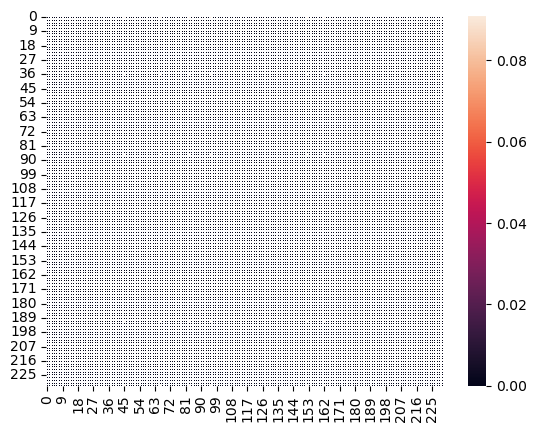

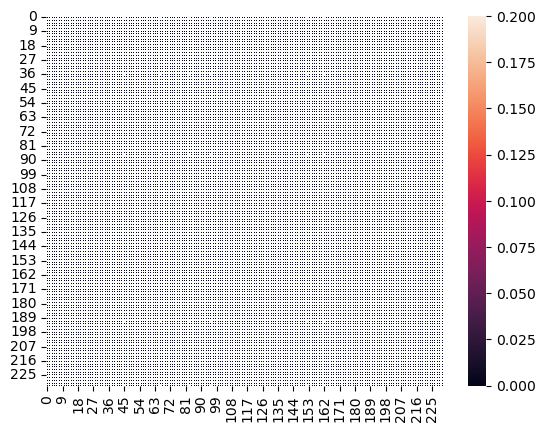

In [91]:
#y_test is already ndarray
Z = predictions.A
print(Z.shape)
Y = y_test.A
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

### Confusion Matrix Article

Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0
Max value:  0.19999999999999998 . Min value:  0.0


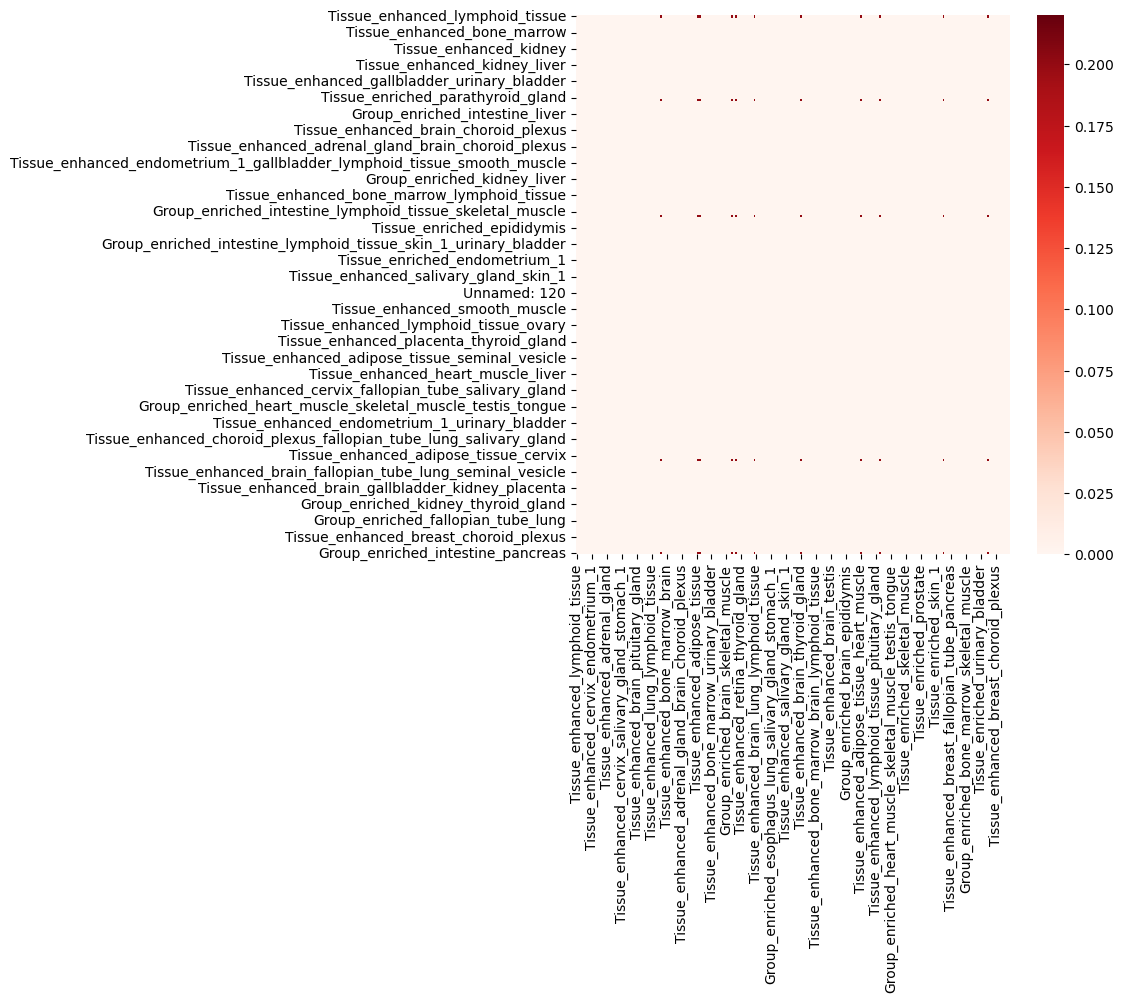

[0, 36, 86, 191, 231]
Tissue_enhanced_lymphoid_tissue
Tissue_enriched_liver
Group_enriched_bone_marrow_lymphoid_tissue
Tissue_enriched_retina
Group_enriched_intestine_pancreas


<Figure size 640x480 with 0 Axes>

In [92]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
    
plt.figure(figsize = (7,7))   
df_precision_M = pd.DataFrame(precision_M, columns = df_train.iloc[:,:-2].columns, index = df_train.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/RakelD/CM_RakelD_" + split_factor_file_train + "_article.eps", transparent=True, format='eps')

plt.show()
plt.clf()


#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df_train.columns[i])
        print(df_train.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/RakelD/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 

In [93]:
df_model_scores.to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Tissue_Age_BMI/ML Models/Scores_Age_BMI_" + split_factor_file_train + ".csv") 

In [94]:
#exit()